# Support Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for Support in 2023 is 43767.6080 dollars. It is profitable, with total net profit at 11093.7486 dollars. This put Support's profit margin at 25.3 %.
>* Revenue growth monthly is mostly negative. Initial revenue growth is lowest (-76 % CMGR in February) and monthly growth values improve but never quite reach positive numbers until September (7.7%) and December (1.9%). Monthly churn rate tend to decrease with each month as active users increase, and by December user churn is 57%. On average, CMGR is -11.8%.
>* On average, Support have around 67 users each month, with 30 being active. There is a 66% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Within 5 months in their lifetime, retention rates for most cohort would fall between the range of 20-60% retention rate. Retention would increase around Q4, especially for earlier cohorts. 
>* In general, NDR rates are below 100%. Exceptions are usually from cohorts with relatively low initial purchase.
>* There are no negative CLV values. Profit levels are pretty similar across cohorts. February and March cohort contributes most in profit, with both cohort having the last 4 months in their lifetime above 120.
>
>Profitability
>* Pre-discounts, the overall financial health of Support looks strong with consistently positive profits, and only a few months showing minimal negative profits.
>* Certain periods showed particularly high overall profits. Specifically, September had the highest overall profit with 2164.5620, followed by December with 2068.4014, and November with 1826.9472. These months stand out due to their significantly higher profits compared to other months, likely driven by seasonal trends.
>* High profits observed in end-of-year periods such as September and December might align with periods of increased business activity and consumer spending on software and digital solutions. September may coincide with the start of new fiscal quarters for many businesses, leading to increased budget allocations for SaaS tools to streamline operations and enhance productivity. December typically benefits from the year-end rush as companies finalize their annual budgets and invest in software to leverage year-end promotions and prepare for the new year.  
>
>Discounting EDA
>* Only 39% of orders had discounts, with 20% discounts being the only type offered for Support. This suggest a controlled approach to maintain profit margins while attracting customers.
>* Profit in September dropped significantly from 2164.5620 to 910.4292, a 57.91% reduction.
>* Despite discounts, September, November, and December remain the highest profit months.
>* Not offering discounts leads to higher profitability, while 20% discounts are less profitable and can lead to significant financial harm, as in the case of September. It might be worthwhile to explore discount strategies lower than 20%, which could potentially attract customers without the risk of large financial losses.
>
>Ideal Customer Profile (ICP) EDA
>* For the Support product, treat all segments equally. The SMB segment leads with Total Accounts (53.23%), Net Revenue (47.42%), and Net Profit (4,296.36). The Strategic segment holds significant shares with Net Revenue (35.01%) and Net Profit (3,554.85). The Enterprise segment, though smaller, still achieves a significant Net Profit (3,242.54).
>* Highest-performing industries in the SMB segment are Finance (AMER, EMEA, APJ), Energy (EMEA), Healthcare (AMER), and Tech (EMEA). These sectors are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth. Notably, the Healthcare loss in EMEA exceeds the top gain from Finance in AMER (681.5232), highlighting a critical concern. A 20% discount on a Healthcare order in EMEA (AmerisourceBergen) led to a net loss of -1049.3406, showing that even moderate discounts can cause negative profits if not managed carefully.
>* In the Strategic segment., Finance (EMEA, AMER), Manufacturing (AMER, EMEA), Consumer Products (AMER), Retail (AMER), and Energy (APJ) are the standout industries.
>* Top-performing industries in the Enterprise segment are Manufacturing (AMER, APJ), Finance (AMER), Communications (EMEA), Tech (EMEA, APJ), and Consumer Products (EMEA).
>* AMER consistently grew throughout the year, peaking in May, September, October, and December. December was particularly strong, with the highest sales and net profits. AMER maintained positive net profits each month despite discounts, showcasing robust performance and effective financial management. Overall, AMER had the highest performance.
>* EMEA led in sales early and mid-year, especially in September. However, discounts heavily impacted net profits, particularly in March. Despite this, EMEA rebounded with strong performance in November and December.
>* APJ experienced significant fluctuations in sales and net profits throughout the year, often resulting in negative figures due to heavy discount impacts. Despite peaks in sales, discounts eroded net profits, indicating a need to revise pricing or discount strategies for improved profitability.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod8 = df.query("Product == 'Support'")
# then slice product df by year of analysis
prod8_2023=prod8.query('year == 2023')

----

### General Performance Report

In [18]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod8_2023['reg_date'] = prod8_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_12192\2203510846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod8_2023['reg_date'] = prod8_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [19]:
# make a user df, from the product df
prod8_2023_user = prod8_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [20]:
# from user df, extract month datetime data, from date of first purchase
prod8_2023_user['reg_month']= prod8_2023_user['reg_date'].values.astype('datetime64[M]')

In [21]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod8_2023_user['key'] = 1
prod8_2023_user = template_table.merge(prod8_2023_user,on='key')
prod8_2023_user =prod8_2023_user.drop('key',axis=1)

In [22]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod8_2023_user = prod8_2023_user[prod8_2023_user['Month']>=prod8_2023_user['reg_month']]

In [ ]:
prod8_2023['Month'] = prod8_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod8_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod8_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod8_2023_user = prod8_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod8_2023_user = prod8_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_1240\2340568382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod8_2023['Month'] = prod8_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod8_2023_user['user'] = 1    
prod8_2023_user['new user'] = (prod8_2023_user['reg_month'] == prod8_2023_user['Month']) * 1 
prod8_2023_user['active'] = (prod8_2023_user['Sales'] > 0) * 1   
prod8_2023_user['active_prev'] = (prod8_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod8_2023_user['change_status'] = (prod8_2023_user['active'] != prod8_2023_user['active_prev']) * 1
prod8_2023_user['session_id'] = (prod8_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod8_2023_user['inactive'] = (prod8_2023_user['active'] == 0) * 1
prod8_2023_user['month_inactive'] = (prod8_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#Support monthly user report (2023)
prod8_2023_report = prod8_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod8_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,89.0000,18.0000,5266.5140,5243.8852,583.7676,561.1388,17,17,17
2023-02-01,55.0000,13.0000,1267.4480,1105.9104,657.6296,496.0920,27,10,13
2023-03-01,116.0000,26.0000,4170.8920,3792.1496,1218.2461,839.5037,42,15,23
2023-04-01,99.0000,26.0000,2418.1680,2333.2544,819.7466,734.8330,54,12,20
2023-05-01,141.0000,34.0000,2310.5600,2203.0000,979.3970,871.8370,64,10,27
2023-06-01,156.0000,39.0000,2110.4380,1967.5964,1028.7667,885.9251,70,6,34
2023-07-01,112.0000,29.0000,1880.8300,1732.8060,843.7544,695.7304,77,7,28
2023-08-01,120.0000,33.0000,2039.0320,1900.0256,976.4494,837.4430,84,7,28
2023-09-01,331.0000,71.0000,9508.7240,8254.5912,2164.5620,910.4292,86,2,48


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod8_2023_churn = prod8_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod8_2023_churn['old active'] = (prod8_2023_churn['active'] - prod8_2023_churn['new user'])
prod8_2023_churn['user churn'] = ((1 - (prod8_2023_churn['old active'] / prod8_2023_churn['user'].shift(1))) * 100).round()
prod8_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,5266.5140,561.1388,17,17,17,0,NaN
2023-02-01,1267.4480,496.0920,27,10,13,3,82.0000
2023-03-01,4170.8920,839.5037,42,15,23,8,70.0000
2023-04-01,2418.1680,734.8330,54,12,20,8,81.0000
2023-05-01,2310.5600,871.8370,64,10,27,17,69.0000
2023-06-01,2110.4380,885.9251,70,6,34,28,56.0000
2023-07-01,1880.8300,695.7304,77,7,28,21,70.0000
2023-08-01,2039.0320,837.4430,84,7,28,21,73.0000
2023-09-01,9508.7240,910.4292,86,2,48,46,45.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [16]:
#monthly avg. user churn
prod8_2023_churn[["user", "active", "user churn"]].mean()

user         66.7500
active       29.5000
user churn   66.2727
dtype: float64

In [19]:
prod8_2023_churn[["new user"]].mean()

new user   8.0000
dtype: float64

In [24]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report= prod8_2023_churn.reset_index()
sales_report['month'] = sales_report.index + 1

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 5266.5140, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month', 'month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report

,Month,Sales,net_profit,user,new user,active,old active,user churn,CMGR
0,2023-01-01,5266.5140,561.1388,17,17,17,0,NaN,0.0000
1,2023-02-01,1267.4480,496.0920,27,10,13,3,82.0000,-75.9338
2,2023-03-01,4170.8920,839.5037,42,15,23,8,70.0000,-11.0076
3,2023-04-01,2418.1680,734.8330,54,12,20,8,81.0000,-22.8526
4,2023-05-01,2310.5600,871.8370,64,10,27,17,69.0000,-18.6142
5,2023-06-01,2110.4380,885.9251,70,6,34,28,56.0000,-16.7144
6,2023-07-01,1880.8300,695.7304,77,7,28,21,70.0000,-15.7692
7,2023-08-01,2039.0320,837.4430,84,7,28,21,73.0000,-12.6770
8,2023-09-01,9508.7240,910.4292,86,2,48,46,45.0000,7.6651
9,2023-10-01,2265.3420,967.1238,89,3,32,29,66.0000,-8.9479


In [22]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-2.3495868994096867

In [23]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

-11.842303205302091

In [24]:
prod8_2023[['Sales', 'net_profit']].sum()

Sales        43767.6080
net_profit   11093.7486
dtype: float64

In [25]:
# Total monthly profit margin
(11093.7486/  43767.6080) * 100

25.346938311090707

In [26]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.3927
net_profit,0.3927,1.0000


**Key findings:**
1. On average, Support have around 67 users each month, with 30 being active. There is a 66% likelihood of users churning in the next month. Number of accounts and quantity of purchases tend to increase by the end of the year, with September being the highest (71 accounts and 331 units purchased ). However, number of new users monthly decrease (only 1 new user in December).
2. Revenue growth monthly is mostly negative. Initial revenue growth is lowest (-76 % CMGR in February) and monthly growth values improve but never quite reach positive numbers until September (7.7%) and December (1.9%). Monthly churn rate tend to decrease with each month as active users increase, and by December user churn is 57%. On average, CMGR is -11.8%.
3. Total revenue for Support in 2023 is 43767.6080 dollars. It is profitable, with total net profit at 11093.7486 dollars. This put Support's profit margin at 25.3 %.
4. Increase in monthly revenue does not equal an increase in monthly profit. Sales of October was lower than in March (2265.3420 compared to 2418.1680), yet it yielded higher profit (967.1238 compared to 734.8330). Using a correlation test, we can see that there is a weak positive correlation between revenue and profit.

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod8_2023_user['date']=prod8_2023_user['Month'].dt.to_period('M')
prod8_2023_user['cohort']= prod8_2023_user['reg_month'].dt.to_period('M')
prod8_2023_user['lifetime'] = (prod8_2023_user['date'] - prod8_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod8_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1007,AmerisourceBergen,2023-01-20,2023-01-01,4.0000,21.6960,17.3568,11.3904,7.0512,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1021,Coca-Cola,2023-01-31,2023-01-01,4.0000,31.6800,25.3440,9.1080,2.7720,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod8_cohort = prod8_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod8_cohort ['active rate'] = (prod8_cohort['active'] / prod8_cohort['user']) * 100
prod8_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,17,17,17,100.0000
1,2023-01-01,1,17,0,3,17.6471
2,2023-01-01,2,17,0,4,23.5294
3,2023-01-01,3,17,0,3,17.6471
4,2023-01-01,4,17,0,6,35.2941
...,...,...,...,...,...,...
73,2023-10-01,1,3,0,0,0.0000
74,2023-10-01,2,3,0,1,33.3333
75,2023-11-01,0,6,6,6,100.0000
76,2023-11-01,1,6,0,4,66.6667


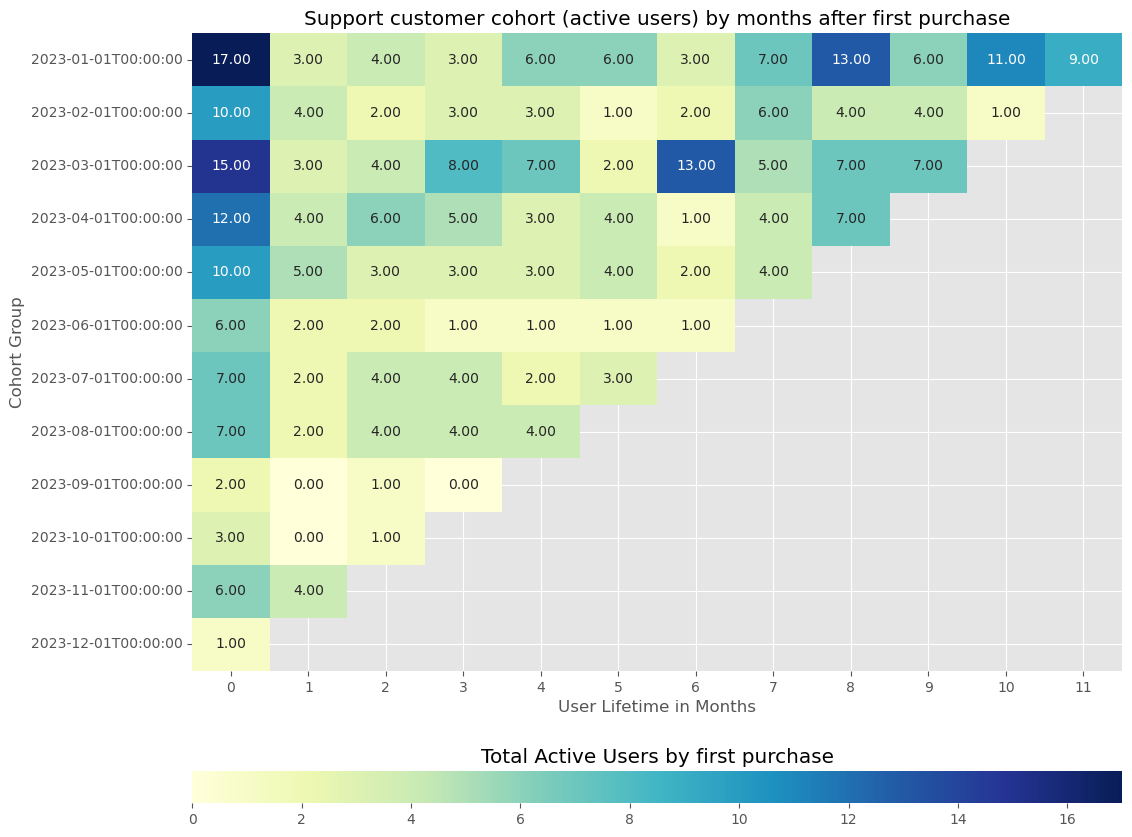

In [18]:
# customer cohort
pivot0 =prod8_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- There is a relatively higher number of initial active users in the first 5 months; in the January, February, March, April, and May cohort (17, 10, 15, 12, 10 active users, respectively).
- Within most cohort lifetime, there is a higher user activity in June and towards the end of the year in September, Oktober, November and December. In September, highest user activity can be seen in the January and March cohort (each having 13 active users in September). 

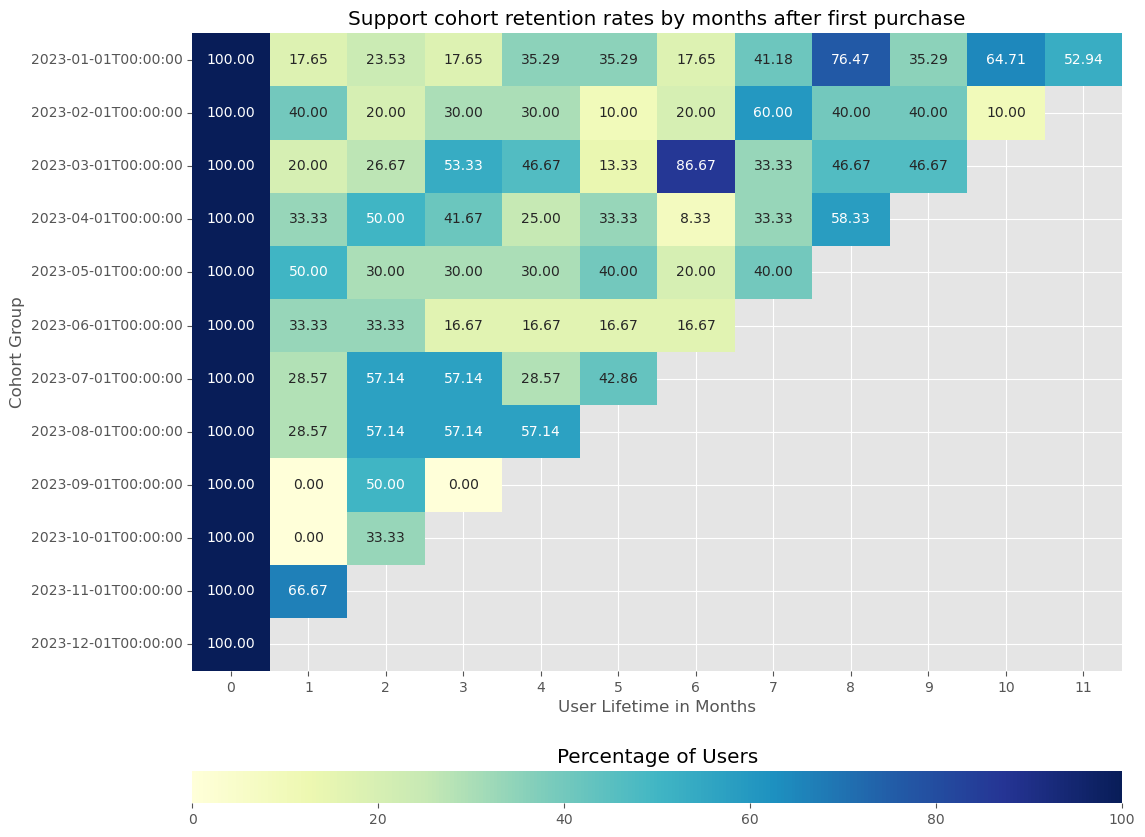

In [19]:
# customer retention
pivot1 =prod8_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

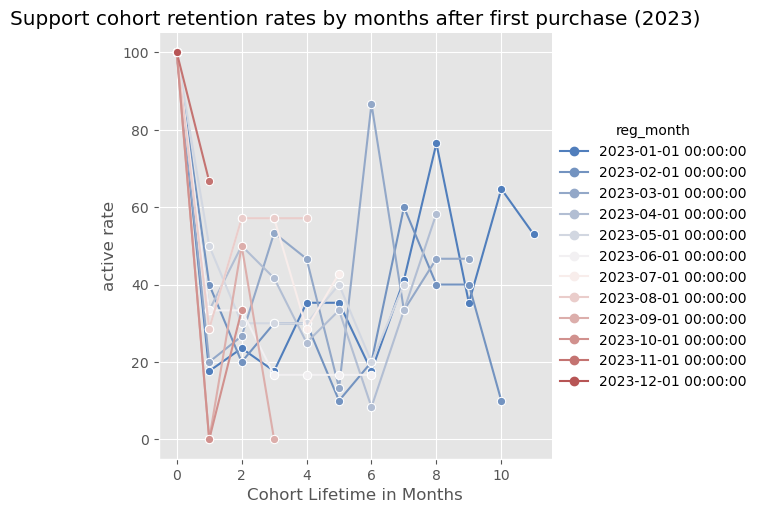

In [20]:
# retention rate lineplots
sns.relplot(data=prod8_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Support cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally, retention rates would drop more significantly for later cohorts than earlier ones.
- Higher retention rates for earlier cohorts, especially during the end of the year; March cohort in September managed to reach 87% retention rate, but falls again right after. 
- Within 5 months in their lifetime, retention rates for most cohort would fall between the range of 20-60% retention rate.

In [17]:
prod8_cohort2 =prod8_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

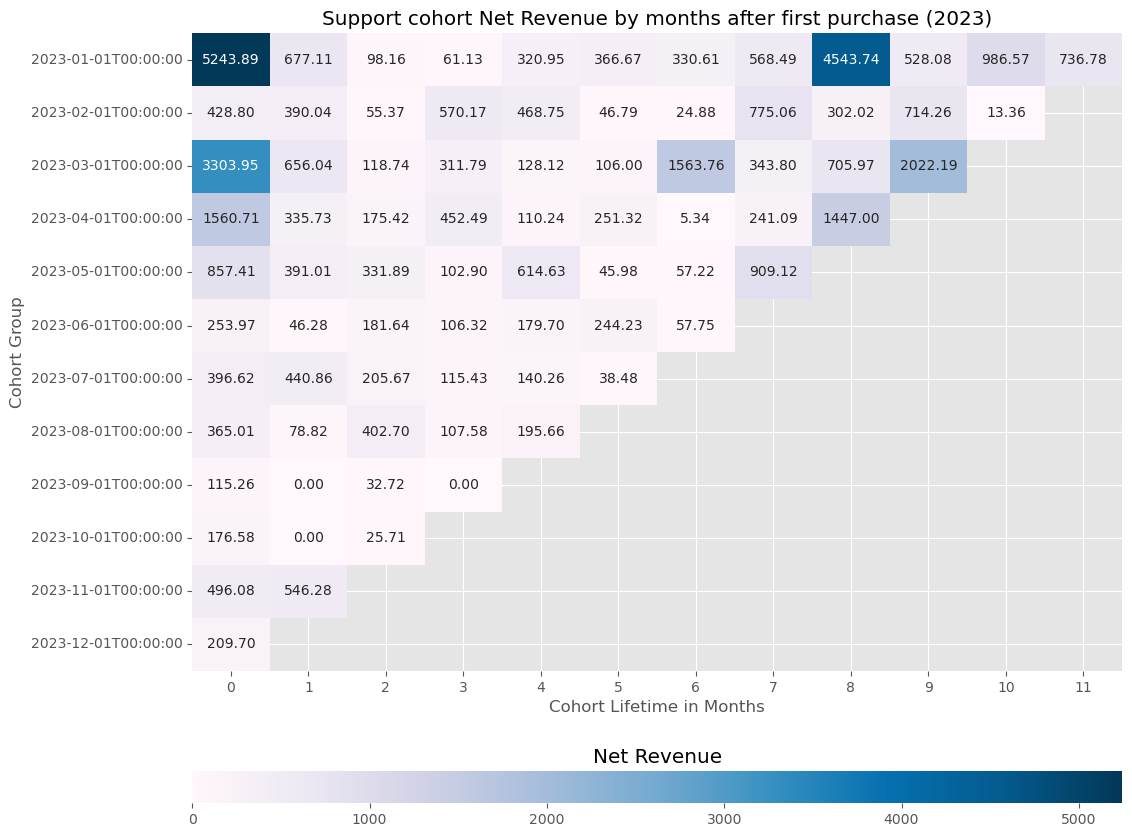

In [22]:
# Net Revenue by Cohort
pivot2 =prod8_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- Generally for most cohorts, puchases are pretty inconsistent throught their lifetime. Most months, purchases never exceed 600. Some cohorts may exceed this at later periods in their lifetime, however. March cohort, for example, contributes 1563.76 in revenue at September, and 2022.19 at December.
- January cohort has the highest initial purchase (5249.89), along with the most significant subsequent purchase in September (4543.74). These two purchases, however, are far-and between in value, as general purchases in the cohort's lifetime falls around 600 and with some even below 100.

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod8_2023_user.loc[prod8_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod8_cohort2 = prod8_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod8_cohort2 ['net dollar retention'] = (prod8_cohort2['discounted_sales'] / prod8_cohort2['ds_max']) * 100

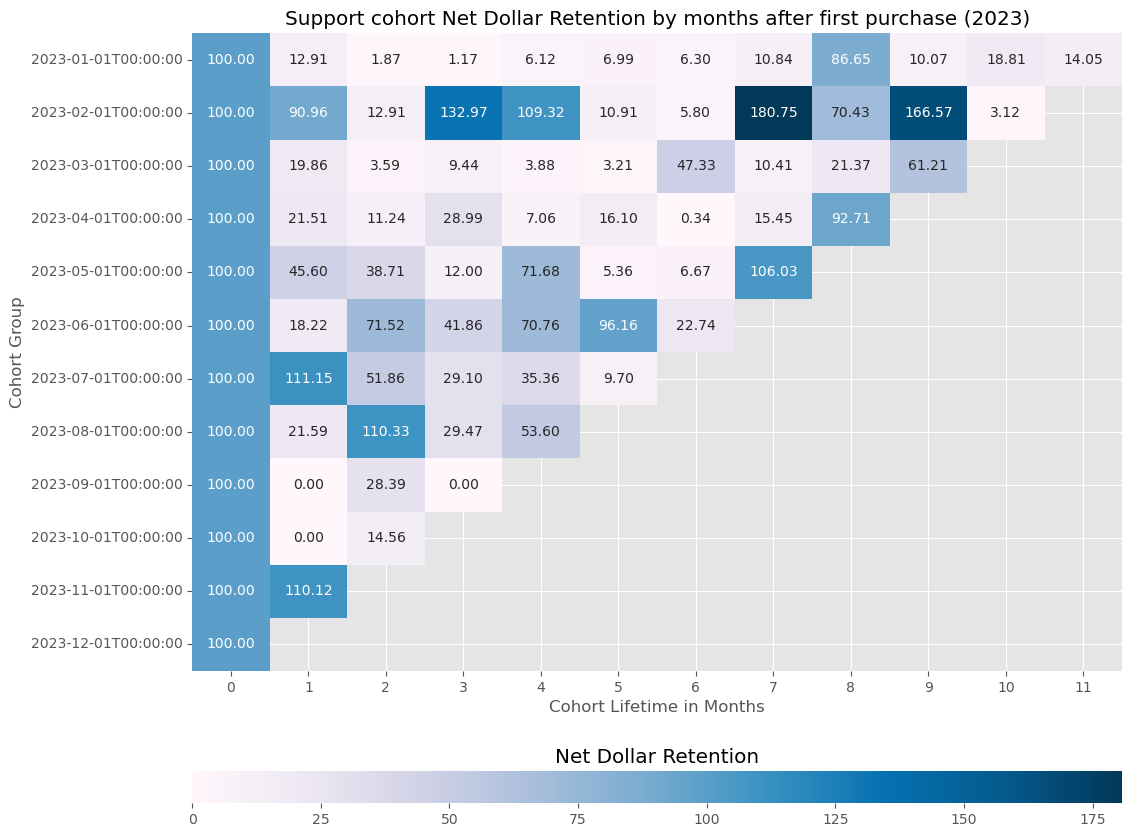

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod8_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

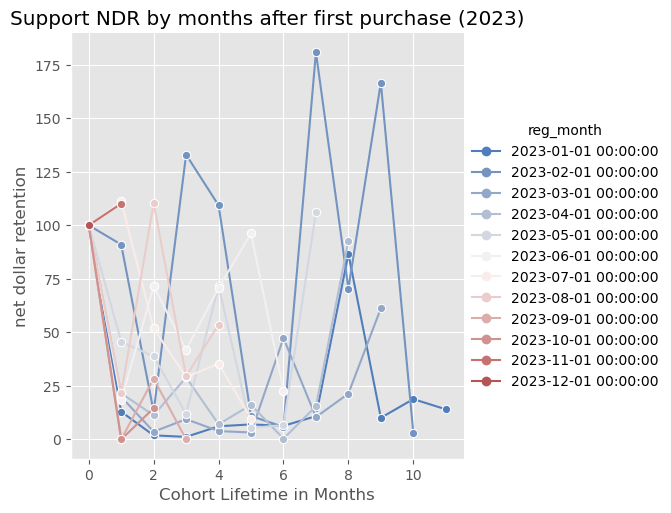

In [21]:
# some data are easier to read with a different chart- NDR lineplots
sns.relplot(data=prod8_cohort2, x="lifetime", y="net dollar retention",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Support NDR by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally NDR rates are below 100% for Support. Exceptions are usually from cohorts with relatively low initial purchase.
- There is significant series of high NDR rates in the February cohort, peaking in September at 180.75%.
- Month of December saw relatively high NDR rates from two cohorts, May cohort (106.03%) and November cohort (110.12%).
- Though there is high NDR rates from the July cohort (111.15%, in August) and the August cohort (110.33% in October), the rates would drop to quite low rates in the following month.

In [19]:
prod8_cohort2 ['cumulative lifetime revenue'] = prod8_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

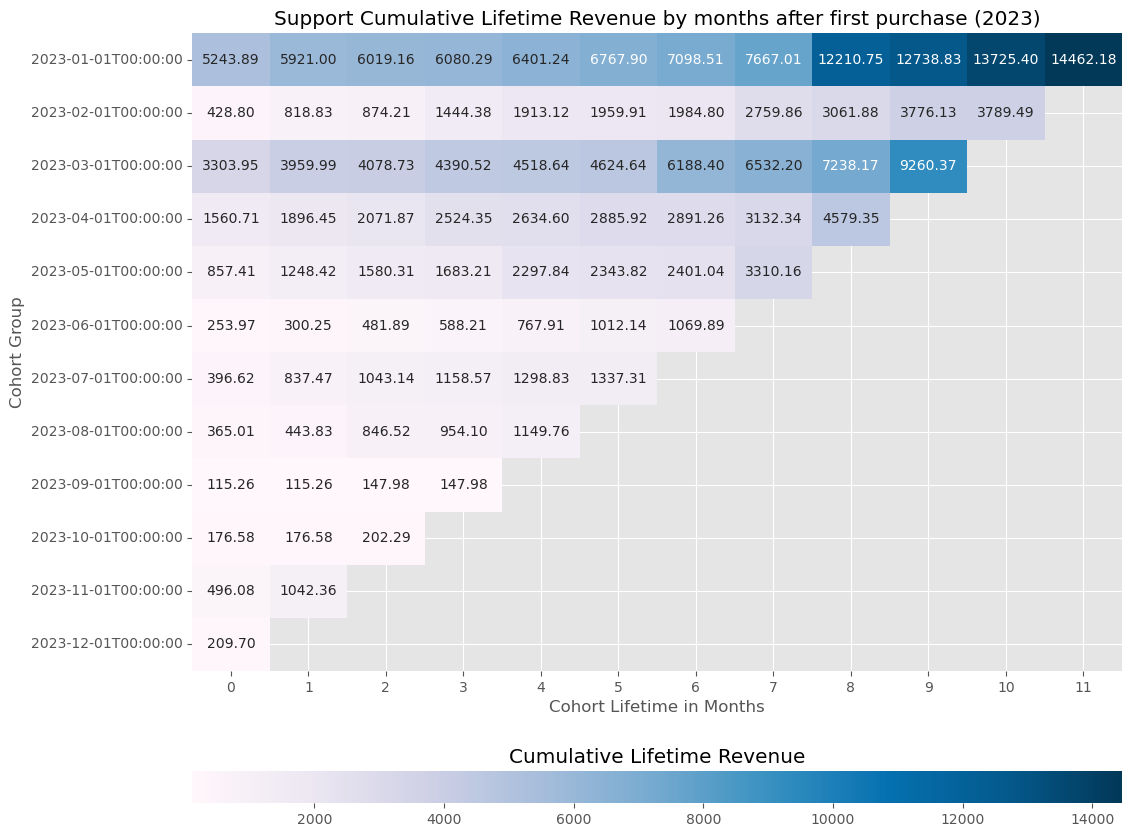

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod8_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

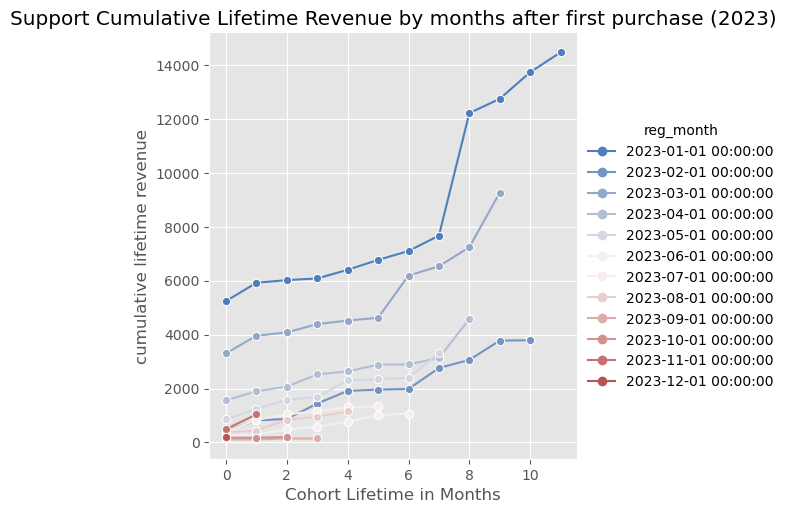

In [25]:
#  cumulative lifetime revenue lineplots
sns.relplot(data=prod8_cohort2, x="lifetime", y="cumulative lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Support Cumulative Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- We can see that seach cohort follow a relatively same pattern, increasing slowly and slightly higher towards the end of year.
- In terms of scale (in its initial purchase and purchases after), however, the January cohort stands out. It has an initial purchase of around 5k and generated around 14k in revenue by December.

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod8_2023_user.loc[prod8_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod8_cohort2 = prod8_cohort2.merge(user_max,how='left',on=['reg_month'])
prod8_cohort2 ['customer lifetime revenue'] = (prod8_cohort2['cumulative lifetime revenue'] / prod8_cohort2['user_max'])

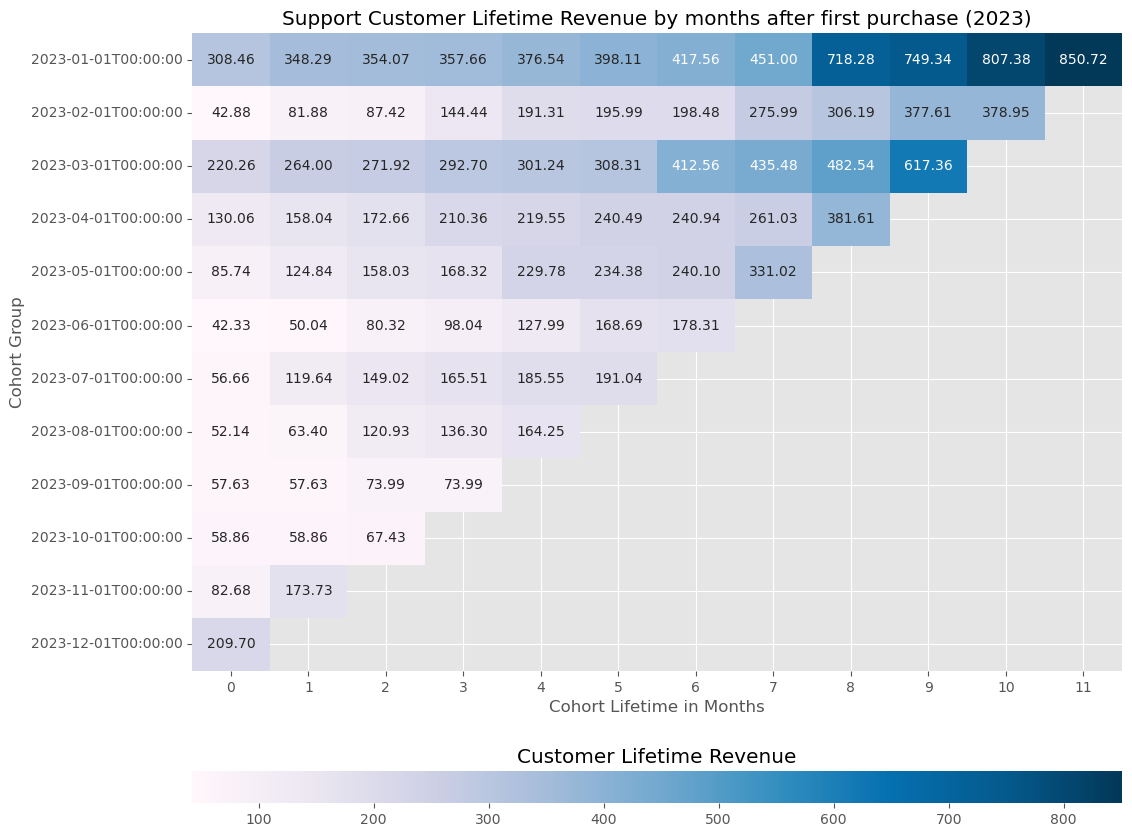

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod8_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

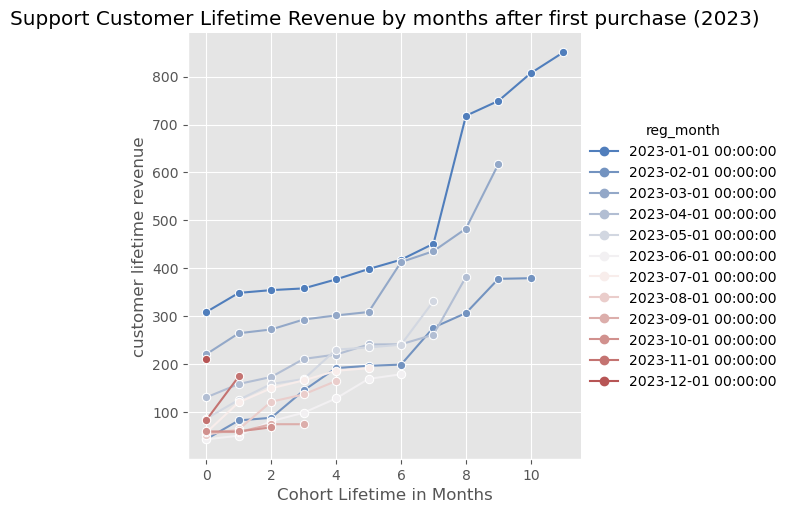

In [21]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod8_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Support Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Looking at per-user revenue, though cohorts differ in its initial user revenue, the margin between subsequent revenues are relatively similar in scale across all cohorts. It suggest that user behavior are similar regarding usage of Support. 
- One cohort that stands out is the January cohort, which had the highest initial user revenue (308.46) and by December has yielded 850.72 in per user revenue. We can also notice that the margin between August revenue and September revenue is quite large for this cohort, suggesting that during this period there is increased demand for Support.


In [21]:
# CLV - but with net profit
prod8_cohort2 ['cum_net_profit'] = prod8_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod8_cohort2 ['Customer Lifetime Value'] = (prod8_cohort2['cum_net_profit'] / prod8_cohort2['user_max'])

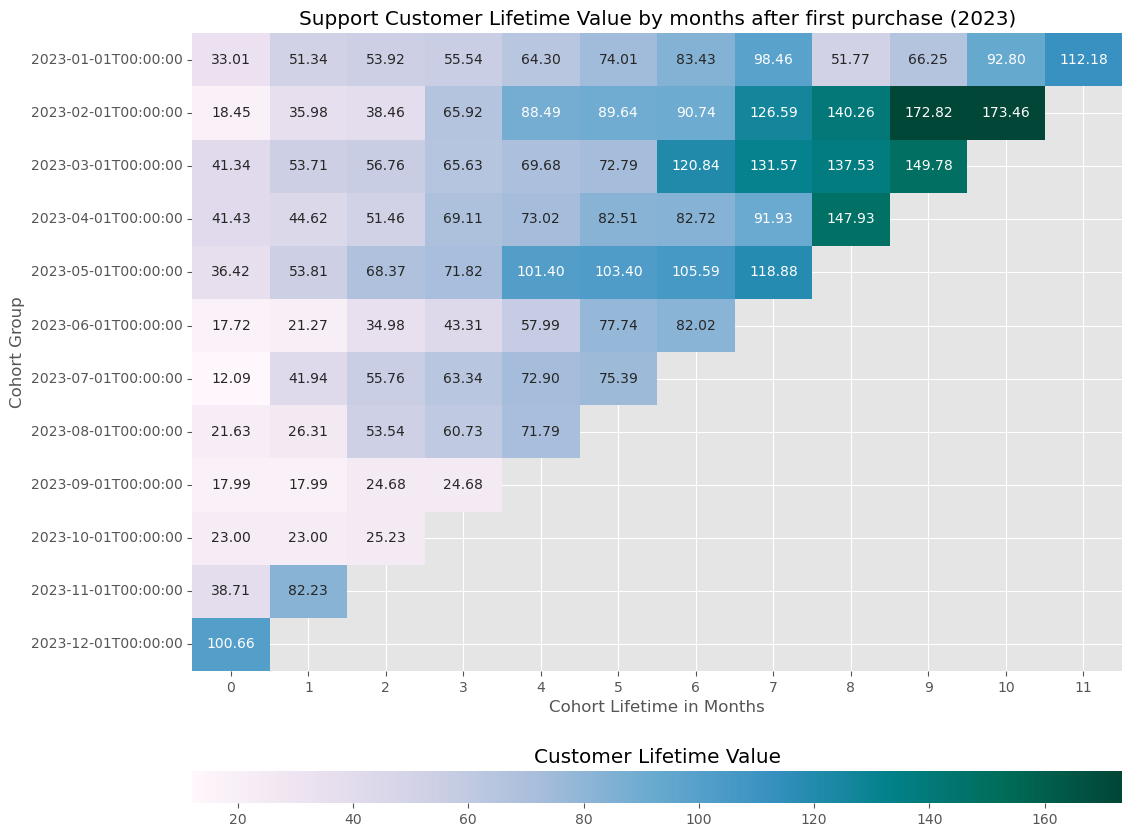

In [ ]:
# Customer Lifetime Value, by cohort
pivot6 =prod8_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='Support Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

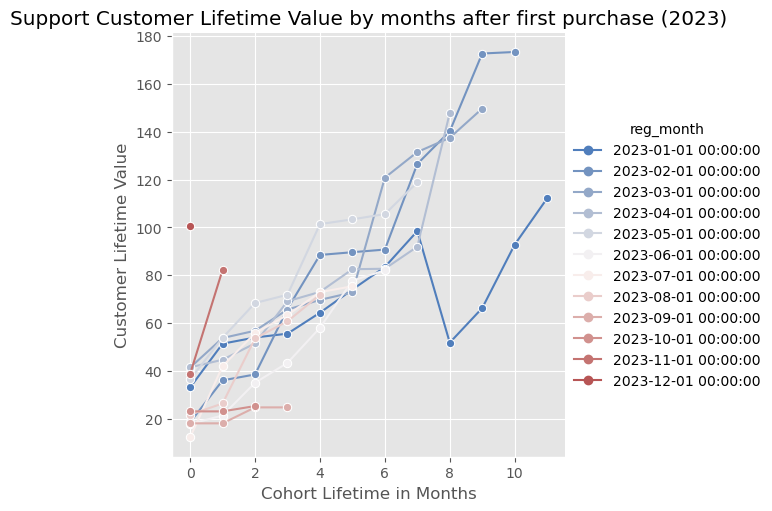

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod8_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('Support Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are no negative profit values per user in the cohorts, meaning that Support is contributing to profit.
- On a per user basis, profit levels are pretty similar across cohorts.  February and March cohort contributes most in profit, with both cohort having the last 4 months in their lifetime above 120. In December, each cohort contributes 173.46 & 149.78 dollars per user, respectively.

**Key findings:**
1. There is a relatively higher number of initial active users in the first 5 cohorts; in the January, February, March, April, and May cohort (17, 10, 15, 12, 10 active users, respectively).
2. Within 5 months in their lifetime, retention rates for most cohort would fall between the range of 20-60% retention rate. Retention would increase around Q4, especially for earlier cohorts. 
3. Monthly revenue generally never exceeds 600 for most cohorts. January cohort has an exceptionally high initial purchase (5249.89), along with the most significant subsequent purchase in September (4543.74). These two purchases, however, are far-and between in value, as general purchases in the cohort's lifetime falls around 600; some even below 100. Support has a pattern, where though cohorts differ in its initial user revenue, the margin between subsequent revenues are relatively similar in scale across all cohorts. It suggest that purchase behavior is similar across all users.
4. In general, NDR rates are below 100%. Exceptions are usually from cohorts with relatively low initial purchase.
5. There are no negative CLV values. Profit levels are pretty similar across cohorts. February and March cohort contributes most in profit, with both cohort having the last 4 months in their lifetime above 120.

### Profitability

In [11]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod8_2023[prod8_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod8_2023[prod8_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

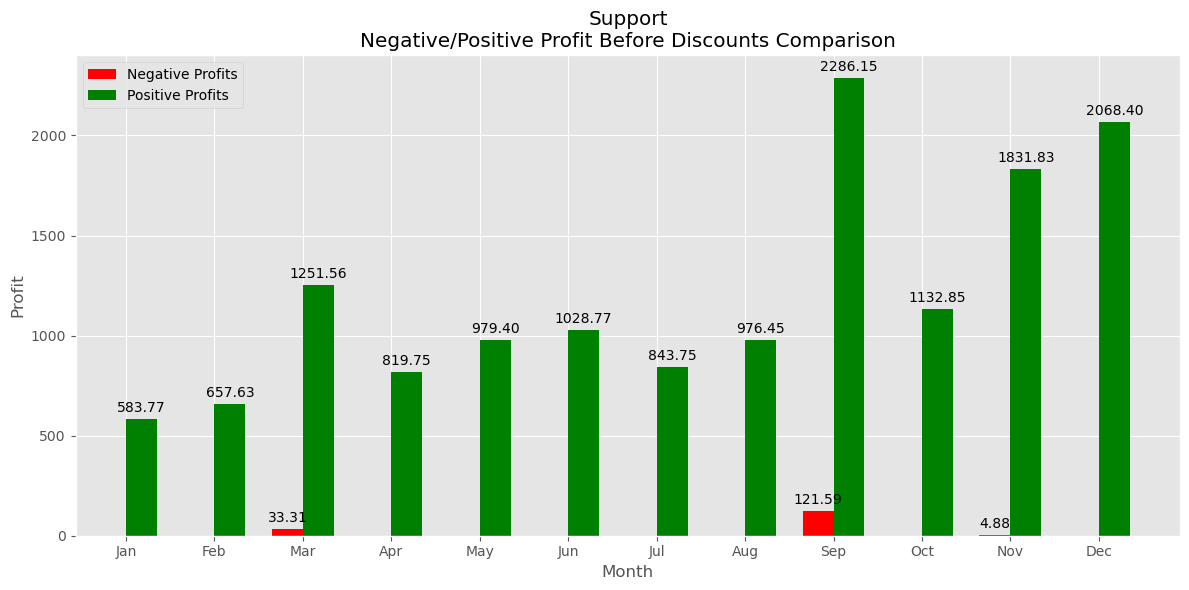

In [24]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Support\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

**Key findings:**
1. Pre-discounts, the overall financial health of Support looks strong with consistently positive profits, and only a few months showing minimal negative profits.
2. Certain periods showed particularly high overall profits. Specifically, September had the highest overall profit with 2164.5620, followed by December with 2068.4014, and November with 1826.9472. These months stand out due to their significantly higher profits compared to other months, likely driven by seasonal trends.
3. High profits observed in end-of-year periods such as September and December might align with periods of increased business activity and consumer spending on software and digital solutions. September may coincide with the start of new fiscal quarters for many businesses, leading to increased budget allocations for SaaS tools to streamline operations and enhance productivity. December typically benefits from the year-end rush as companies finalize their annual budgets and invest in software to leverage year-end promotions and prepare for the new year. 

### Discounting EDA

In [12]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod8_2023[(prod8_2023['net_profit'] < 0)]
post_discount_positives = prod8_2023[(prod8_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

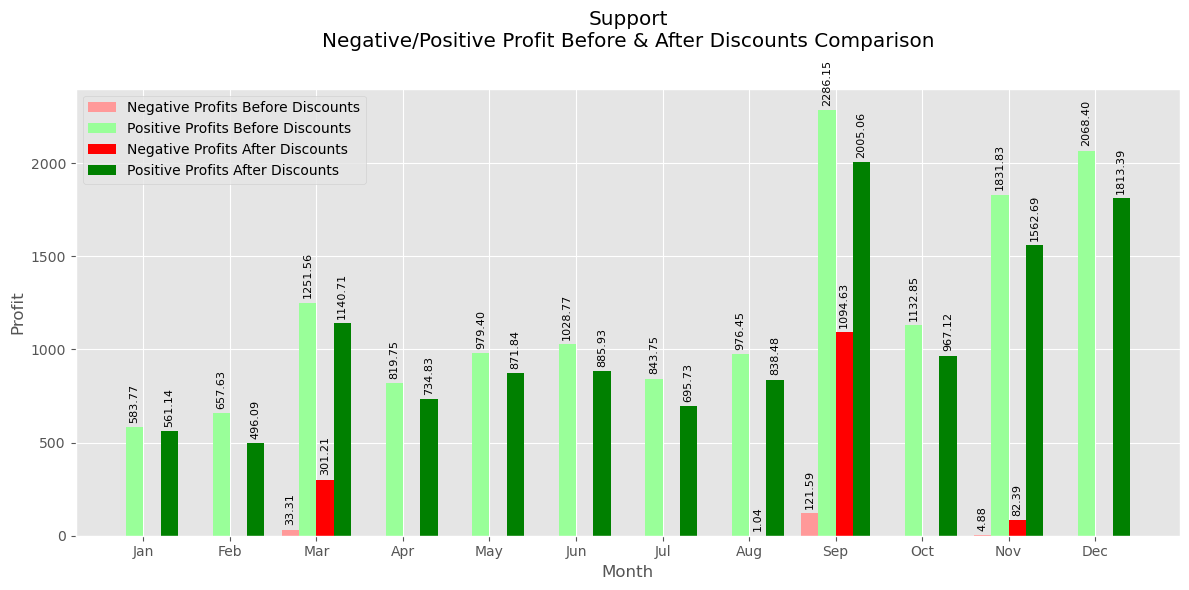

In [28]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Support\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

- After discounting has been accounted, Support saw a slight reduction in positive profit. For instance, the positive profit in January decreased from 583.77 to 561.14, and in February from 657.63 to 496.09. However, some months show increases in negative profits due to discounting. Notably, March's negative profit increased from 33.3124 to 301.2068, and September's from 121.5866 to 1094.6282. Significant increase in negative profits for certain months suggests that heavy discounting was likely applied to specific orders.
- September's profit dropped from 2164.5620 to 910.4292, a reduction of approximately 57.91%. After discounts, the highest overall profit switched to December at 1813.3918.
- Despite reductions from discounts, September, November, and December remain as the three months with highest overall profit after discounts.

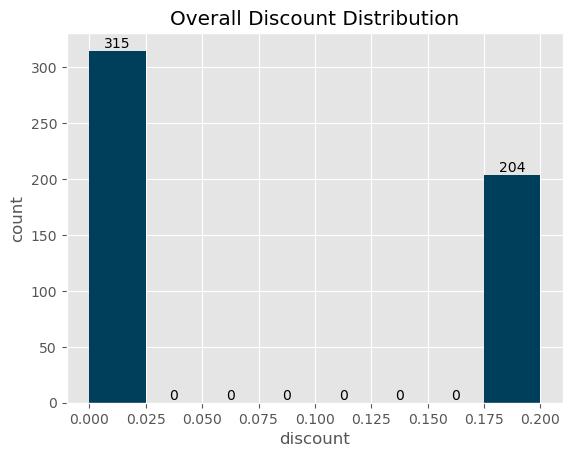

In [7]:
n, bins, patches = plt.hist(data=prod8_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- There were 519 invoices for ChatBot Plugin in 2023, 204 of which were applied discounts (~ 39%). Lower percentage of discounted orders suggests a controlled approach, possibly aimed at maintaining profit margins while still offering some incentives to attract or retain customers. However, we’ve seen that discounts do have a noticeable impact on overall profits, especially in high-profit months like September.
- 204 orders had a 20% discount, the only type offered for ChatBot Plugin. Uniform approach is effective, however there's always room for optimization.

In [15]:
# Range of Discounts (Maret, June, September, December)
filtered_df = prod8_2023[prod8_2023['month'].isin([3, 6, 9, 12])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std     mean        min  median     75%      max  count
month Discount                                                             
3     0.0000    51.8178  40.9723     2.8322 12.8256 43.3002 150.9840     23
      0.2000   106.1944 -10.2860  -299.8116  7.6908 22.2107 102.7740     10
6     0.0000    45.8384  27.3647     2.0430  9.3312 22.4414 219.4416     24
      0.2000    12.1110  12.0618     0.8388  7.9200 13.1860  47.5072     19
9     0.0000    38.8688  30.9146     2.1900 15.2292 34.2144 201.3120     49
      0.2000   183.9898 -17.7760 -1049.3406  5.4432 10.2708  88.0740     34
12    0.0000    48.1450  28.4197     0.1744 13.3035 27.4302 301.9680     49
      0.2000    33.8714  21.0414     3.6288  7.2930 24.0658 146.7900     20

- Not offering discounts consistently leads to positive profitability. In March, the mean profit is 51.8178 (median 43.3002). In June, it is 45.8384 (median 22.4414). For September, it reaches 38.8688 (median 34.2144). In December, the mean is 48.1450 (median 27.4302). 
- A 20% discount is sometimes profitable but less so than no discounts. In March, the mean profit is -10.2860 (median 7.6908) compared to 51.8178 (median 43.3002) with no discount. In June, the mean profit is 12.0618 (median 7.9200) versus 45.8384 (median 22.4414). However, in September, the 20% discount shows significant losses with a minimum profit of -1049.3406, highlighting the risk of substantial financial harm.

**Key findings:**
1. Only 39% of orders had discounts, with 20% discounts being the only type offered for Support. This suggest a controlled approach to maintain profit margins while attracting customers.
2. Profit in September dropped significantly from 2164.5620 to 910.4292, a 57.91% reduction.
3. Despite discounts, September, November, and December remain the highest profit months.
4. Not offering discounts leads to higher profitability, while 20% discounts are less profitable and can lead to significant financial harm, as in the case of September. It might be worthwhile to explore discount strategies lower than 20%, which could potentially attract customers without the risk of large financial losses.

### Segmentation EDA

In [23]:
# make a segment df, from the product df
prod8_2023_segment = prod8_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod8_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod8_2023_percents = segment_account.merge(prod8_2023_segment,how='left',on=['Segment'])
prod8_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,78,329,7384.3960,7125.6648,3501.2742,3242.5430
1,SMB,239,1017,21398.8020,19234.8996,6460.2606,4296.3582
2,Strategic,132,553,14984.4100,14200.2740,4338.9834,3554.8474


In [24]:
# calculate percentage of segment's business share by category
prod8_2023_percents['% Account']= prod8_2023_percents['account'] / prod8_2023_percents['account'].sum() *100
prod8_2023_percents['% Quantity']= prod8_2023_percents['Quantity'] / prod8_2023_percents['Quantity'].sum() *100
prod8_2023_percents['% Sales']= prod8_2023_percents['Sales'] / prod8_2023_percents['Sales'].sum() *100
prod8_2023_percents['% Net Revenue']= prod8_2023_percents['discounted_sales'] / prod8_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod8_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod8_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

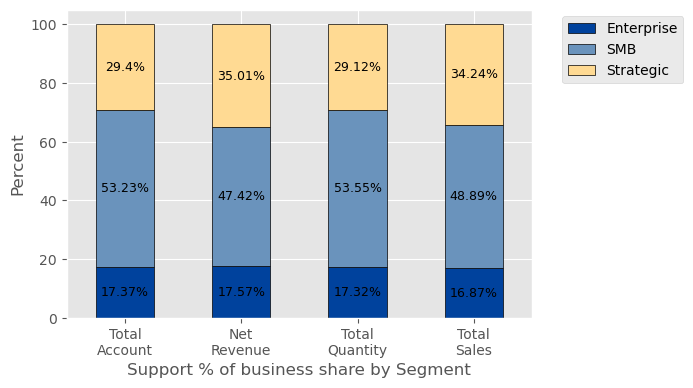

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod8_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Support % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "Support" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for Support based on the last year of company activity.
- SMB segment holds the highest share in Total Accounts (53.23%), Net Revenue (47.42%), Total Quantity (53.55%), and Total Sales (48.89%), indicating a dominant presence for the Support product.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

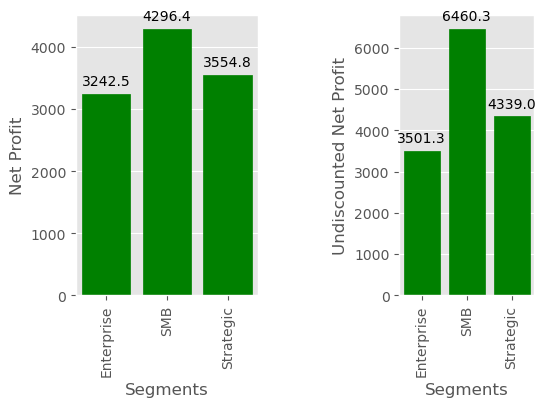

In [36]:
# Support net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod8_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod8_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads the Support product in Total Accounts (53.23%), Total Quantity (53.55%), Net Revenue (47.42%), and Total Sales (48.89%). It also shows the highest Net Profit Before Discount (6460.2606) and a substantial positive Net Profit (4296.3582), making it the top performer.
- Strategic segment maintains significant shares in Total Accounts (29.40%), Net Revenue (35.01%), Total Quantity (29.12%), and Total Sales (34.24%). It demonstrates strong financial performance with a Net Profit Before Discount (4338.9834) and a positive Net Profit (3554.8474).
- Enterprise segment, while having the lowest shares compared to the other segments, still maintains a consistent presence in Total Accounts (17.37%) and Net Revenue (17.57%). It achieves a positive Net Profit of 3242.5430, demonstrating efficient cost management and profitability.

SMB segment is the key contributor to profitability for the Support product, demonstrating strong contributions in both revenue and profitability. The Strategic segment also shows positive financial performance, while the Enterprise segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

### Further Inquiries on Segments -----------

In [27]:
# Copy-pasted code for Industry queries within segment
# Industries using Support within the SMB Segment
prod8_2023_industry_SMB = prod8_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod8_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod8_2023_percents_SMB = SMB_account.merge(prod8_2023_industry_SMB,how='left',on=['Industry'])
prod8_2023_percents_SMB['% Account']= prod8_2023_percents_SMB['account'] / prod8_2023_percents_SMB['account'].sum() *100
prod8_2023_percents_SMB['% Quantity']= prod8_2023_percents_SMB['Quantity'] / prod8_2023_percents_SMB['Quantity'].sum() *100
prod8_2023_percents_SMB['% Sales']= prod8_2023_percents_SMB['Sales'] / prod8_2023_percents_SMB['Sales'].sum() *100
prod8_2023_percents_SMB['% Net Revenue']= prod8_2023_percents_SMB['discounted_sales'] / prod8_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod8_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod8_SMB = percents_SMB.columns.tolist()
# Industries using Support within the Strategic Segment
prod8_2023_industry_Strategic = prod8_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod8_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod8_2023_percents_Strategic = Strategic_account.merge(prod8_2023_industry_Strategic,how='left',on=['Industry'])
prod8_2023_percents_Strategic['% Account']= prod8_2023_percents_Strategic['account'] / prod8_2023_percents_Strategic['account'].sum() *100
prod8_2023_percents_Strategic['% Quantity']= prod8_2023_percents_Strategic['Quantity'] / prod8_2023_percents_Strategic['Quantity'].sum() *100
prod8_2023_percents_Strategic['% Sales']= prod8_2023_percents_Strategic['Sales'] / prod8_2023_percents_Strategic['Sales'].sum() *100
prod8_2023_percents_Strategic['% Net Revenue']= prod8_2023_percents_Strategic['discounted_sales'] / prod8_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod8_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod8_Strategic = percents_Strategic.columns.tolist()
# Industries using Support within the Enterprise Segment
prod8_2023_industry_Enterprise = prod8_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod8_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod8_2023_percents_Enterprise = Enterprise_account.merge(prod8_2023_industry_Enterprise,how='left',on=['Industry'])
prod8_2023_percents_Enterprise['% Account']= prod8_2023_percents_Enterprise['account'] / prod8_2023_percents_Enterprise['account'].sum() *100
prod8_2023_percents_Enterprise['% Quantity']= prod8_2023_percents_Enterprise['Quantity'] / prod8_2023_percents_Enterprise['Quantity'].sum() *100
prod8_2023_percents_Enterprise['% Sales']= prod8_2023_percents_Enterprise['Sales'] / prod8_2023_percents_Enterprise['Sales'].sum() *100
prod8_2023_percents_Enterprise['% Net Revenue']= prod8_2023_percents_Enterprise['discounted_sales'] / prod8_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod8_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod8_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

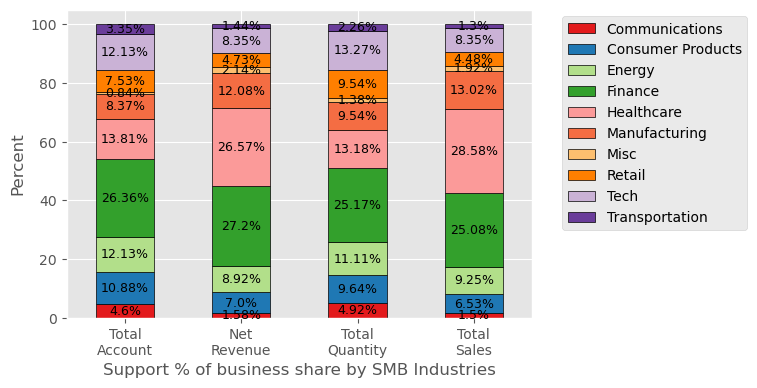

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod8_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Support % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (26.36%), Net Revenue (27.20%), and Total Quantity (25.17%).
- Healthcare industry shows strong performance with the highest share in Total Sales (28.58%) and significant shares in Total Accounts (13.81%) and Net Revenue (26.57%).
- Energy and Tech industries maintain consistent shares across categories, contributing notably to Net Revenue and Total Sales.
- Communications and Consumer Products industries show moderate shares across categories, maintaining a presence in the SMB segment.
- Manufacturing industry has notable shares in Total Accounts (8.37%) and Total Sales (13.02%).
- Misc industry, despite lower shares, maintains a presence in the segment.
- Retail industry shows moderate shares in Total Accounts (7.53%) and Total Quantity (9.54%).
- Transportation industry, despite lower shares, contributes to Total Sales (1.30%).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

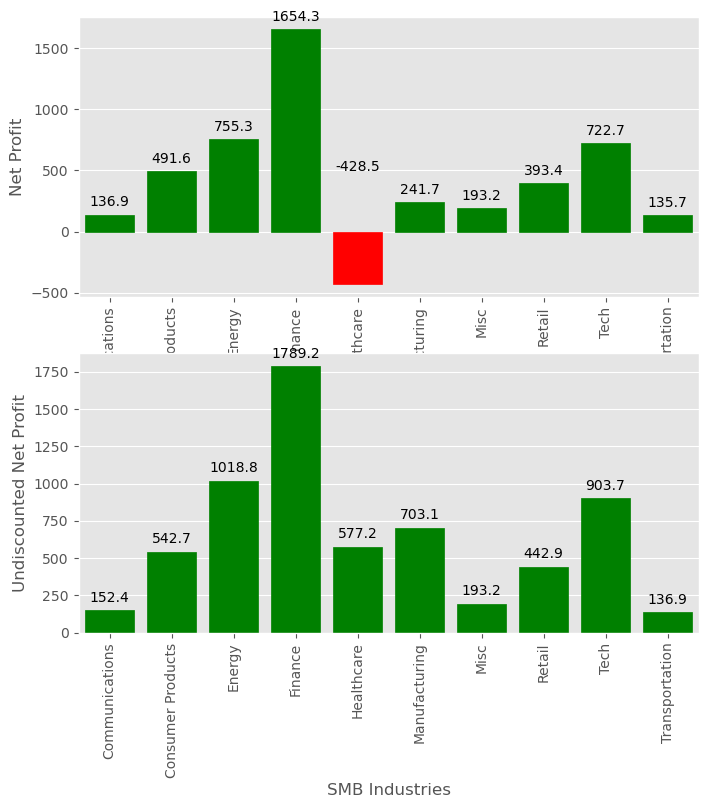

In [39]:
# Support net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod8_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod8_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the SMB segment in Total Accounts (26.36%), Total Quantity (25.17%), Net Revenue (27.20%), and Total Sales (25.08%). It also shows the highest Net Profit Before Discount (1789.2443) and a substantial positive Net Profit (1654.2587).
- Healthcare industry, while having significant shares in Total Sales (28.58%) and Total Accounts (13.81%), reports a negative Net Profit of -428.4761 despite a positive Net Profit Before Discount (577.1975), indicating challenges in profitability.
- Energy industry shows strong performance with the highest Net Profit Before Discount (1018.7893) and a substantial positive Net Profit (755.2725).
- Tech and Manufacturing industries maintain consistent shares across categories, contributing notably to Net Revenue and Total Sales, with positive net profits of 722.6990 and 241.7443, respectively.
- Communications and Consumer Products industries show moderate shares across categories, maintaining a presence in the SMB segment, with positive net profits.
- Misc, Retail, and Transportation industries, despite lower shares, achieve positive net profits of 193.2452, 393.4346, and 135.6640, respectively.

Finance, Energy, Tech, Manufacturing, Communications, and Consumer Products industries are key contributors to profitability within the SMB segment of the Support product, demonstrating strong contributions in both revenue and profitability. The Misc, Retail, and Transportation industries also show positive financial performance. The Healthcare industry, despite significant shares, faces challenges in achieving profitability.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

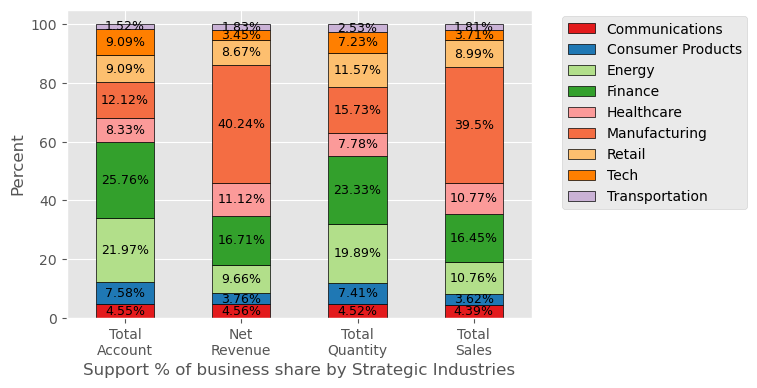

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod8_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Support % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (25.76%) and Total Quantity (23.33%), showing significant presence in the Strategic segment.
- Manufacturing industry dominates in Net Revenue (40.24%) and Total Sales (39.50%), indicating a strong financial performance.
- Energy industry maintains consistent shares across categories, contributing notably to Net Revenue (9.66%) and Total Sales (10.76%).
- Healthcare industry shows notable shares in Net Revenue (11.12%) and Total Sales (10.77%), maintaining a presence in the segment.
- Retail, Tech, and Consumer Products industries maintain moderate shares across categories, contributing to the segment's overall performance.
- Communications and Transportation industries, despite lower shares, maintain a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

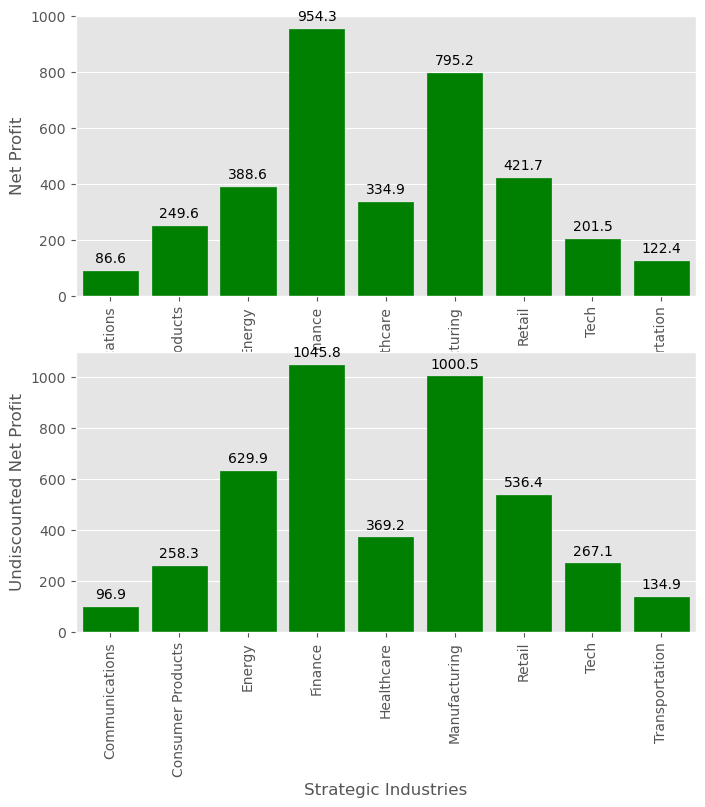

In [41]:
# Support net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod8_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod8_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the Strategic segment in Total Accounts (25.76%), Total Quantity (23.33%), Net Revenue (16.71%), and Total Sales (16.45%). It also shows a high Net Profit Before Discount (1045.8096) and a substantial positive Net Profit (954.3232).
- Manufacturing industry dominates in Net Revenue (40.24%) and Total Sales (39.50%), achieving a significant positive Net Profit of 795.2160.
- Energy industry shows strong performance with consistent shares across categories, achieving a substantial positive Net Profit of 388.6298.
- Healthcare and Retail industries maintain consistent shares in Net Revenue and Total Sales, achieving positive net profits of 334.8589 and 421.7078, respectively.
- Consumer Products and Tech industries, despite moderate shares, achieve positive net profits of 249.6041 and 201.5004, respectively.
- Communications and Transportation industries, despite lower shares, maintain a positive Net Profit of 86.5784 and 122.4288, respectively.

Finance, Manufacturing, and Energy industries are key contributors to profitability within the Strategic segment of the Support product, demonstrating strong contributions in both revenue and profitability. The Healthcare, Retail, Consumer Products, Tech, Communications, and Transportation industries also show positive financial performance, maintaining a presence in the segment.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

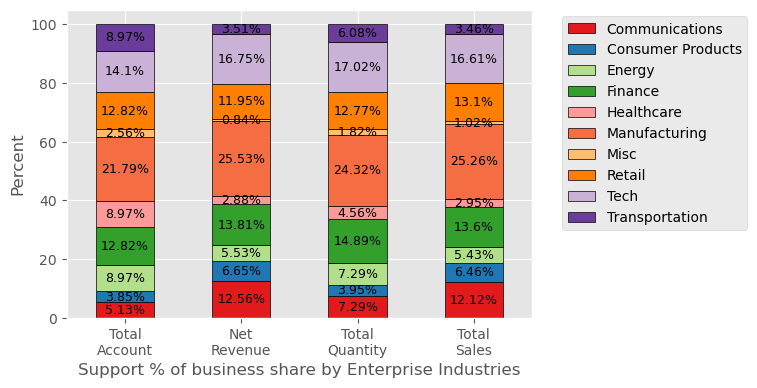

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod8_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('Support % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Manufacturing industry leads in Total Accounts (21.79%), Net Revenue (25.53%), and Total Sales (25.26%).
- Tech industry holds significant shares in Net Revenue (16.75%) and Total Sales (16.61%).
- Retail industry maintains consistent shares across categories, contributing notably to Net Revenue and Total Sales.
- Finance industry shows strong performance with significant shares in Total Accounts (12.82%), Net Revenue (13.81%), and Total Sales (13.60%).
- Communications industry maintains a presence with notable shares in Net Revenue (12.56%) and Total Sales (12.12%).
- Energy, Healthcare, Consumer Products, and Transportation industries show moderate shares across categories.
- Misc industry has lower shares but still maintains a presence in the segment.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Transportation')])

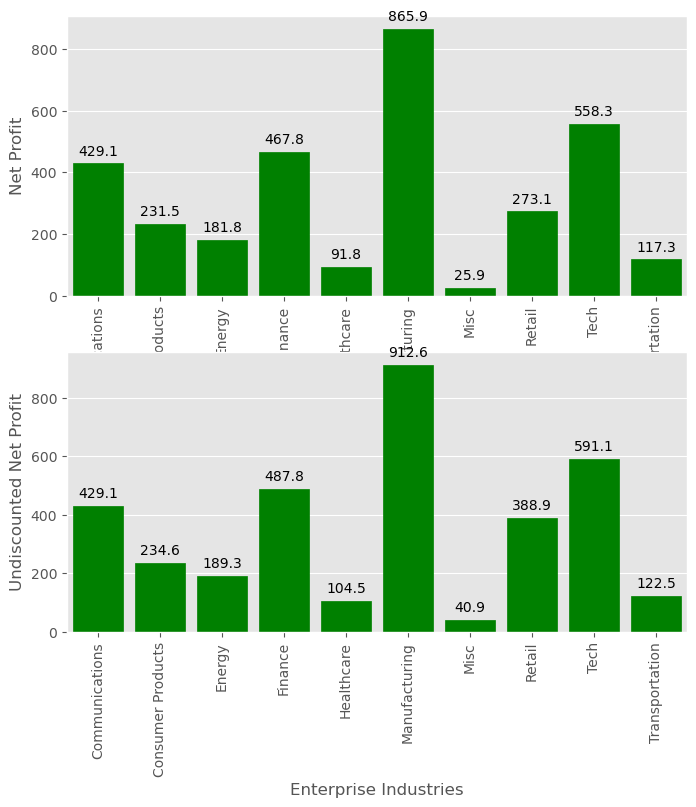

In [43]:
# Support net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod8_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod8_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Manufacturing industry leads the Enterprise segment in Total Accounts (21.79%), Net Revenue (25.53%), and Total Sales (25.26%). It also shows a high Net Profit Before Discount (912.6057) and a substantial positive Net Profit (865.9065), making it the top performer.
- Tech industry holds significant shares in Net Revenue (16.75%) and Total Sales (16.61%), achieving a substantial positive Net Profit of 558.2906.
- Finance industry shows strong performance with significant shares in Total Accounts (12.82%), Net Revenue (13.81%), and Total Sales (13.60%), achieving a substantial positive Net Profit of 467.8026.
- Retail industry maintains consistent shares across categories, contributing notably to Net Revenue and Total Sales, with a positive Net Profit of 273.1289.
- Communications industry maintains a presence with notable shares in Net Revenue (12.56%) and Total Sales (12.12%), achieving a substantial positive Net Profit of 429.1126.
- Energy and Healthcare industries, while having moderate shares, achieve positive net profits of 181.8072 and 91.8325, respectively.
- Consumer Products and Transportation industries, despite lower shares, maintain positive net profits of 231.4920 and 117.288, respectively.
- Misc industry, despite lower shares, achieves a positive Net Profit of 25.8816.

Manufacturing, Tech, and Finance industries are key contributors to profitability within the Enterprise segment of the Support product, demonstrating strong contributions in both revenue and profitability. The Retail and Communications industries also show positive financial performance, maintaining a presence in the segment. The Energy, Healthcare, Consumer Products, Transportation, and Misc industries, while having lower shares, achieve positive financial performance.

**Key findings:**
1. For the Support product, treat all segments equally. The SMB segment leads with Total Accounts (53.23%), Net Revenue (47.42%), and Net Profit (4,296.36). The Strategic segment holds significant shares with Net Revenue (35.01%) and Net Profit (3,554.85). The Enterprise segment, though smaller, still achieves a significant Net Profit (3,242.54).

### Regional EDA

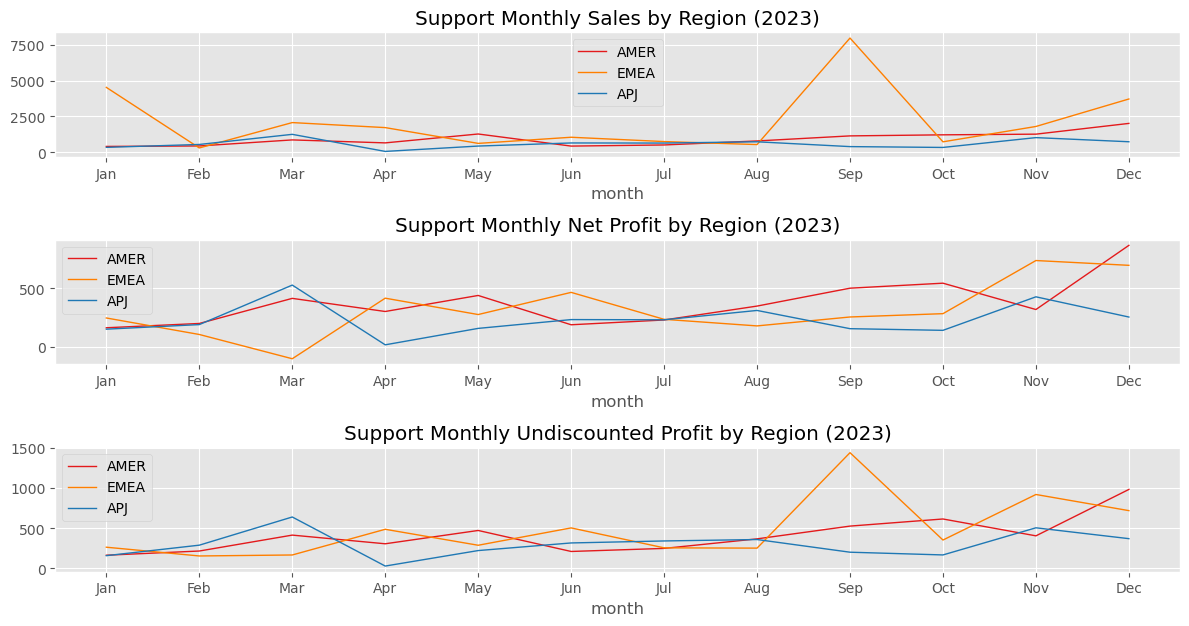

In [7]:
# Support Monthly Income EDA by Region (2023)
prod8_region_month = prod8_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod8_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod8_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod8_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Support Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod8_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod8_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod8_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Support Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod8_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod8_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod8_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('Support Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

EMEA often led in sales early and mid-year, with standout performance in September. APJ only led in February. With significant impacts of discounts on profits, AMER generally led overall, followed by EMEA and then APJ.
- AMER showed consistent growth, peaking in May, September, October, and December, with the highest sales and net profits in December, maintaining positive net profits every month despite discounts.
- EMEA had high sales in January and standout performance in September, but discounts hit net profits hard, especially in March. Strong late-year performance with high sales and net profits in November and December.
- APJ had variable performance with peaks in March and November, but significant drops in April and September, with discounts heavily impacting net profits throughout the year.

Performance Highlights
- Highest Sales: In EMEA, September shows the highest sales of 7982.6520.
- Highest Net Profit: The highest net profit is seen in AMER, December, with a net profit of 864.3532.
- Highest Undiscounted Profit: AMER in December also shows the highest undiscounted profit at 981.3756.

In [8]:
prod8_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,31,400.9300,400.9300,163.3110,163.3110
1,AMER,2,27,434.0440,418.3832,215.4598,199.7990
2,AMER,3,30,856.3000,856.3000,413.3481,413.3481
3,AMER,4,30,648.7860,644.9428,305.5634,301.7202
4,AMER,5,67,1270.2640,1237.3552,471.0431,438.1343
5,AMER,6,48,424.2760,403.0888,209.9401,188.7529
6,AMER,7,45,503.4260,484.8228,248.0732,229.4700
7,AMER,8,35,783.8180,764.9684,366.6141,347.7645
8,AMER,9,97,1137.8940,1112.5052,525.3956,500.0068
9,AMER,10,44,1212.1640,1140.8392,613.8611,542.5363


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

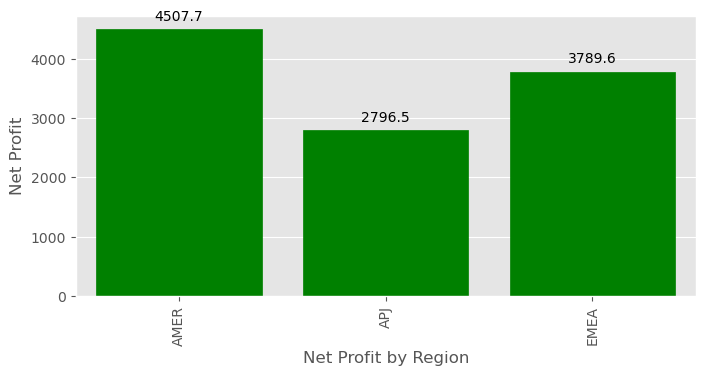

In [9]:
prod8_region = prod8_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod8_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [10]:
prod8_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,643,10941.6620,10531.0876,4918.2292,4507.6548
1,APJ,465,7065.9300,6272.3540,3590.0961,2796.5201
2,EMEA,791,25760.0160,23757.3968,5792.1929,3789.5737


High-Performing Region
- AMER consistently demonstrates strong sales and net profits throughout the year, peaking in key months such as May, September, October, and December, excelling particularly in the later part of the year and maintaining positive net profits every month.
- Needs to better manage the impact of discounts on net profits while maintaining consistent growth.

Mixed Performance
- EMEA shows impressive sales figures, particularly in the early and middle parts of the year, with standout performance in September. However, significant impacts from discounts notably affect its net profits, resulting in periods of lower profitability, though it maintains strong performance in late-year months like November and December with substantial net profits.
- Although it has high sales and notable peaks, discounts significantly impact net profits, and there are periods of lower profitability.

Challenging Region
- APJ exhibits variable performance throughout the year, with high peaks in March and November but significant drops in April and September. In addition, this region is heavily impacted by discounts, reducing overall profitability. Overall, while it has potential for high sales and net profits in certain months, it struggles with consistency and the negative effects of discounts on its financial outcomes.
- Faces variability in performance with significant impacts from discounts, resulting in lower overall sales and net profits compared to other regions.

In [8]:
grouped = prod8_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [9]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

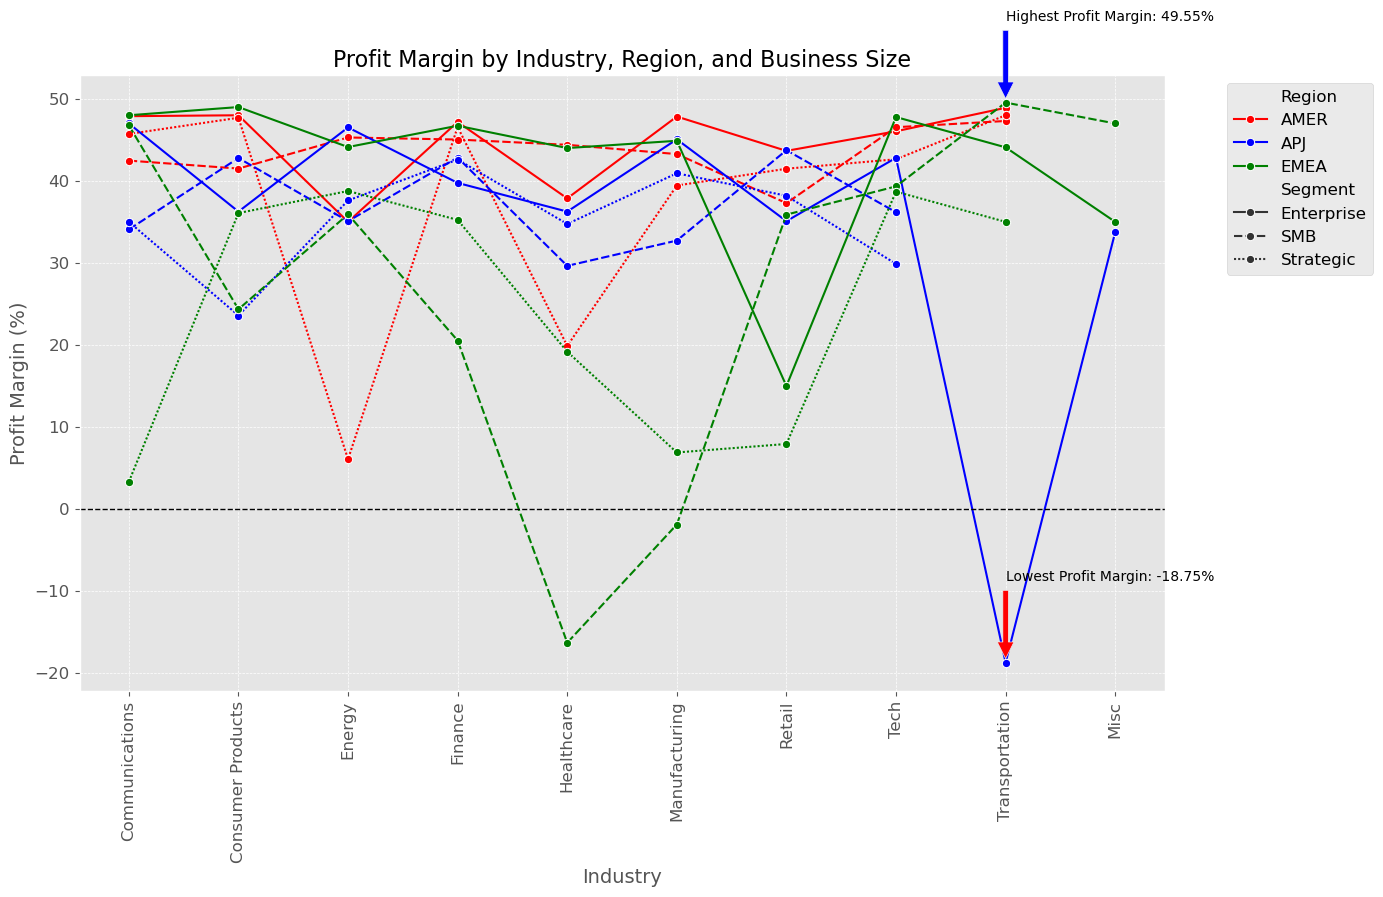

In [10]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [11]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])

#### Cross-segment SMB

In [12]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

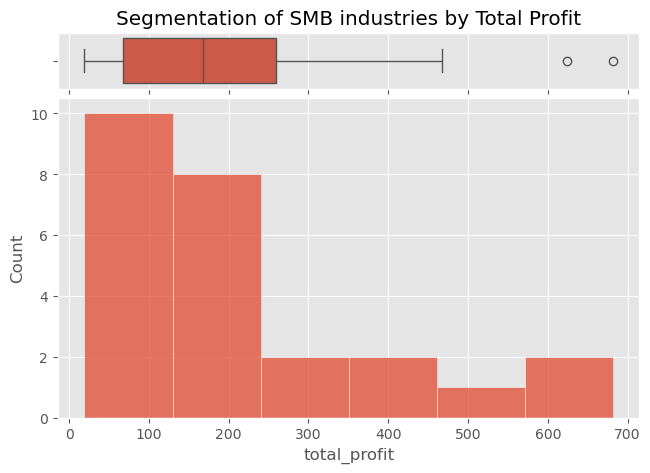

0.0000    19.1980
0.2500    67.5650
0.5000   167.8898
0.7500   259.7781
1.0000   681.5232
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 259.78 in profit
- 3 (Good) : Contributes between 167.89 and 259.78 in profit
- 2 (Marginal) : Contributes between 67.56 and 167.89 in profit
- 1 (Underperforming) : Contributes less than 67.56 in profit


In [13]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [14]:
smb_positive_profit_metrics['segmentation score'] = pd.qcut(
    smb_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
12,AMER,SMB,Finance,681.5232,0.0231,4
66,EMEA,SMB,Finance,623.6973,0.0813,4
65,EMEA,SMB,Energy,466.7711,0.1412,4
13,AMER,SMB,Healthcare,382.1257,0.0615,4
71,EMEA,SMB,Tech,374.2402,0.1200,4
40,APJ,SMB,Finance,349.0382,0.0909,4
43,APJ,SMB,Retail,259.7781,0.1000,3
11,AMER,SMB,Energy,220.9364,0.0444,3
16,AMER,SMB,Tech,206.8792,0.0333,3
69,EMEA,SMB,Misc,193.2452,0.0000,3


In [15]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in AMER, Finance in EMEA, Energy in EMEA, Healthcare in AMER, Tech in EMEA, Finance in APJ are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Retail in APJ, Energy in AMER, Tech in AMER, Misc in EMEA, Consumer Products in AMER, Manufacturing in APJ all maintain solid profitability.
While not the highest-performing, these SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Consumer Products in APJ, Tech in APJ, Consumer Products in EMEA, Manufacturing in AMER, Transportation in EMEA, Retail in AMER, Energy in APJ, Communications in EMEA, Retail in EMEA, Communications in AMER, Transportation in AMER, Healthcare in APJ, Communications in APJ are underperforming.
Th

In [16]:
###Filter negative profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_negative_profit_metrics = metrics[(metrics['total_profit'] < 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_negative_profit_metrics = smb_negative_profit_metrics.sort_values(by='total_profit', ascending=True)

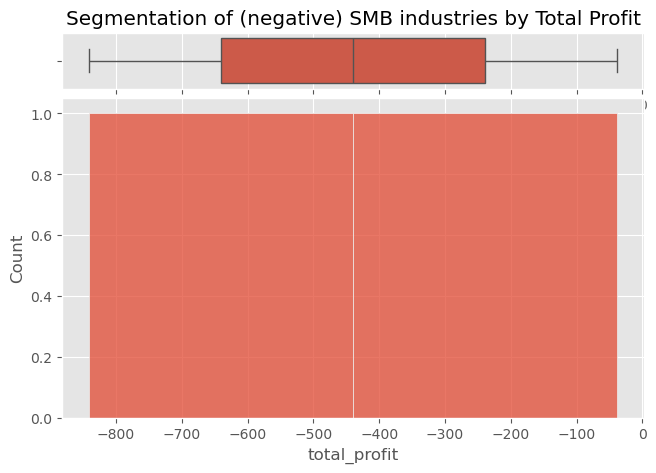

0.0000   -841.1911
0.2500   -640.4713
0.5000   -439.7515
0.7500   -239.0318
1.0000    -38.3120
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Severe) : Loses more than -640.47 in profit
- 3 (Significant) : Loses between -640.47 and -439.75 in profit
- 2 (Negative) : Loses between -439.75 and -239.03 in profit
- 1 (Marginal) : Loses less than -239.03 in profit


In [17]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_negative_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of (negative) SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_negative_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Severe) : Loses more than {quantiles[0.25]:.2f} in profit\n"
      f"- 3 (Significant) : Loses between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 2 (Negative) : Loses between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 1 (Marginal) : Loses less than {quantiles[0.75]:.2f} in profit")

In [18]:
smb_negative_profit_metrics['segmentation score'] = pd.qcut(
    smb_negative_profit_metrics['total_profit'],             
    q=4,                               
    labels=[4, 3, 2, 1]                 
).astype(int)

smb_negative_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
67,EMEA,SMB,Healthcare,-841.1911,0.1000,4
68,EMEA,SMB,Manufacturing,-38.3120,0.1200,1


Top-performing industries within the SMB segment include Finance (AMER: 681.5232, EMEA: 623.6973, APJ: 349.0382), Energy in EMEA (466.7711), Healthcare in AMER (382.1257), and Tech in EMEA (374.2402). Collectively, these gains total 2,877.3957. These industries are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

On the other hand, significant losses come from Healthcare in EMEA (-841.1911) and Manufacturing in EMEA (-38.3120), totaling -879.5031. Remarkably, the loss from Healthcare in EMEA surpasses the top gain from Finance in AMER (681.5232), highlighting a critical area of concern. Analyzing the data reveals that a 20% discount in a Healthcare order within EMEA (AmerisourceBergen) led to a net loss of -1049.3406, indicating that even moderate discounts can result in negative profits if not carefully calculated.

In [20]:
query = prod8_2023[(prod8_2023['Region'] == 'EMEA') & (prod8_2023['Industry'] == 'Healthcare') & (prod8_2023['Segment'] == 'SMB') & (prod8_2023['net_profit'] < 0)]
query

,Order ID,Order Date,Date Key,Customer ID,Customer,Segment,Industry,Region,Subregion,Country,City,Product,Sales,Quantity,Discount,net_profit,total_discount_in_dollars,selling_price,(net)_profit_before_discount,net_profit_per_unit_sold,profit_margin,discounted_sales,month,year,year_month
1803,EMEA-2023-158379,2023-09-23,20230923,1007,AmerisourceBergen,SMB,Healthcare,EMEA,EU-WEST,France,Paris,Support,4663.7360,7,0.2000,-1049.3406,932.7472,666.2480,-116.5934,-149.9058,-22.5000,3730.9888,9,2023,2023-09


#### Cross-segment Strategic

In [21]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

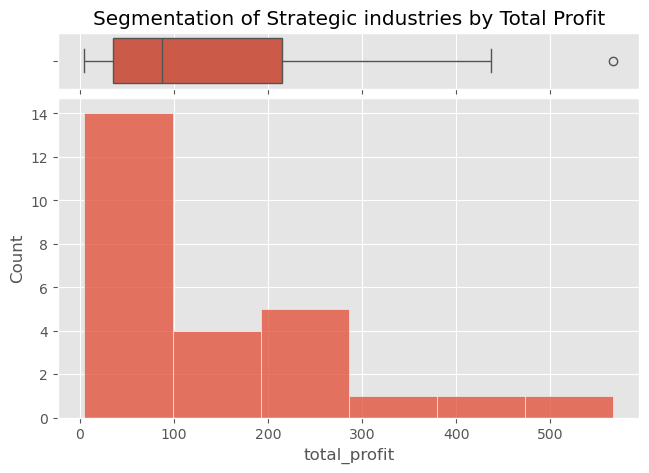

0.0000     4.8424
0.2500    35.1528
0.5000    87.2598
0.7500   214.9162
1.0000   566.5398
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 214.92 in profit
- 3 (Good) : Contributes between 87.26 and 214.92 in profit
- 2 (Marginal) : Contributes between 35.15 and 87.26 in profit
- 1 (Underperforming) : Contributes less than 35.15 in profit


In [22]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [23]:
strategic_positive_profit_metrics['segmentation score'] = pd.qcut(
    strategic_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
76,EMEA,Strategic,Finance,566.5398,0.0583,4
23,AMER,Strategic,Manufacturing,437.2821,0.0571,4
78,EMEA,Strategic,Manufacturing,325.2289,0.0571,4
21,AMER,Strategic,Finance,266.8404,0.0286,4
19,AMER,Strategic,Consumer Products,231.6721,0.0000,4
24,AMER,Strategic,Retail,223.2285,0.0400,4
47,APJ,Strategic,Energy,219.0954,0.1667,4
77,EMEA,Strategic,Healthcare,202.3785,0.0400,3
51,APJ,Strategic,Retail,169.6799,0.1333,3
75,EMEA,Strategic,Energy,127.0381,0.0833,3


In [24]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Strategic segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in EMEA, Manufacturing in AMER, Manufacturing in EMEA, Finance in AMER, Consumer Products in AMER, Retail in AMER, Energy in APJ are the highest performing industries in the Strategic segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Healthcare in EMEA, Retail in APJ, Energy in EMEA, Finance in APJ, Transportation in AMER, Tech in EMEA all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Healthcare in AMER, Tech in APJ, Communications in AMER, Healthcare in APJ, Tech in AMER, Energy in AMER, Manufacturing in APJ, Retail in EMEA, Transportation in EMEA, Communications in EMEA, Communications in APJ, Consumer Products in EMEA, Consume

#### Cross-segment Enterprise

In [27]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

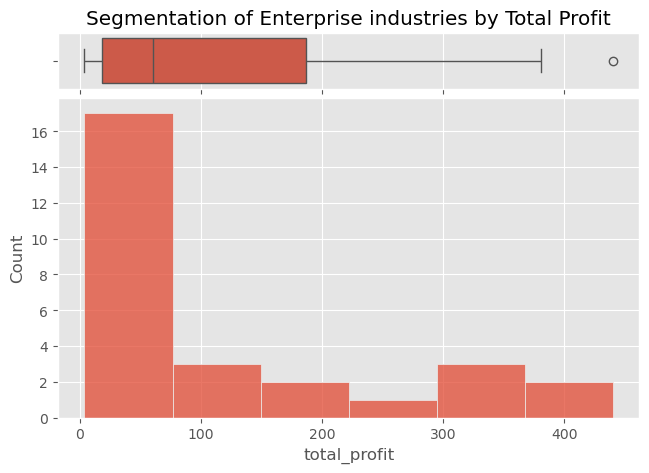

0.0000     3.6288
0.2500    18.5408
0.5000    60.3543
0.7500   186.5519
1.0000   440.1418
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 186.55 in profit
- 3 (Good) : Contributes between 60.35 and 186.55 in profit
- 2 (Marginal) : Contributes between 18.54 and 60.35 in profit
- 1 (Underperforming) : Contributes less than 18.54 in profit


In [28]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [29]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
5,AMER,Enterprise,Manufacturing,440.1418,0.0500,4
3,AMER,Enterprise,Finance,380.8234,0.0444,4
53,EMEA,Enterprise,Communications,354.4992,0.0000,4
32,APJ,Enterprise,Manufacturing,333.5635,0.0571,4
61,EMEA,Enterprise,Tech,302.7624,0.0500,4
35,APJ,Enterprise,Tech,231.8882,0.0857,4
54,EMEA,Enterprise,Consumer Products,219.4416,0.0000,4
34,APJ,Enterprise,Retail,175.5886,0.2000,3
29,APJ,Enterprise,Energy,111.4614,0.0000,3
58,EMEA,Enterprise,Manufacturing,92.2012,0.1000,3


In [30]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = enterprise_positive_profit_metrics[enterprise_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the Enterprise segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Enterprise industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Manufacturing in AMER, Finance in AMER, Communications in EMEA, Manufacturing in APJ, Tech in EMEA, Tech in APJ, Consumer Products in EMEA are the highest performing industries in the Enterprise segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Retail in APJ, Energy in APJ, Manufacturing in EMEA, Transportation in AMER, Healthcare in EMEA, Energy in EMEA, Communications in AMER all maintain solid profitability.
While not the highest-performing, these Enterprise industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Finance in EMEA, Retail in EMEA, Retail in AMER, Transportation in EMEA, Finance in APJ, Tech in AMER, Healthcare in AMER, Misc in EMEA, Communications in APJ, Misc in APJ, Consumer Products in AMER, Consumer Prod

**Key findings:**
1. AMER consistently grew throughout the year, peaking in May, September, October, and December. December was particularly strong, with the highest sales and net profits. AMER maintained positive net profits each month despite discounts, showcasing robust performance and effective financial management. Overall, AMER had the highest performance.
2. EMEA led in sales early and mid-year, especially in September. However, discounts heavily impacted net profits, particularly in March. Despite this, EMEA rebounded with strong performance in November and December.
3. APJ experienced significant fluctuations in sales and net profits throughout the year, often resulting in negative figures due to heavy discount impacts. Despite peaks in sales, discounts eroded net profits, indicating a need to revise pricing or discount strategies for improved profitability.
4. Highest-performing industries in the SMB segment are Finance (AMER, EMEA, APJ), Energy (EMEA), Healthcare (AMER), and Tech (EMEA). These sectors are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth. Notably, the Healthcare loss in EMEA exceeds the top gain from Finance in AMER (681.5232), highlighting a critical concern. A 20% discount on a Healthcare order in EMEA (AmerisourceBergen) led to a net loss of -1049.3406, showing that even moderate discounts can cause negative profits if not managed carefully.
5. In the Strategic segment., Finance (EMEA, AMER), Manufacturing (AMER, EMEA), Consumer Products (AMER), Retail (AMER), and Energy (APJ) are the standout industries.
6. Top-performing industries in the Enterprise segment are Manufacturing (AMER, APJ), Finance (AMER), Communications (EMEA), Tech (EMEA, APJ), and Consumer Products (EMEA).